### **Nama : Maulana Agus Setiawan**
### **NIM  : 2209106024**
##### **Link Dataset : https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset**

### **Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-05 20:13:48.434485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 20:13:48.434538: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 20:13:48.436656: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 20:13:48.649978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:1

### **Import Dataset**

In [2]:
train_img_path = 'Face Mask Dataset/Train'
test_img_path = 'Face Mask Dataset/Test'
validation_img_path = 'Face Mask Dataset/Validation'

### **Read Dataset dan Melakukan Split Dataset menjadi Train,Val,Test**

In [3]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
    validation_split=0.2,
)

In [4]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary', # karena cuma punya 2 Kelas (Masker dan Tanpa Masker)
    subset='training',
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    subset='validation',
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 8000 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


### **Menampilkan nama Kelas yang ada pada Dataset**

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['WithMask', 'WithoutMask']

### **Menampilkan batch gambar dari train generator**

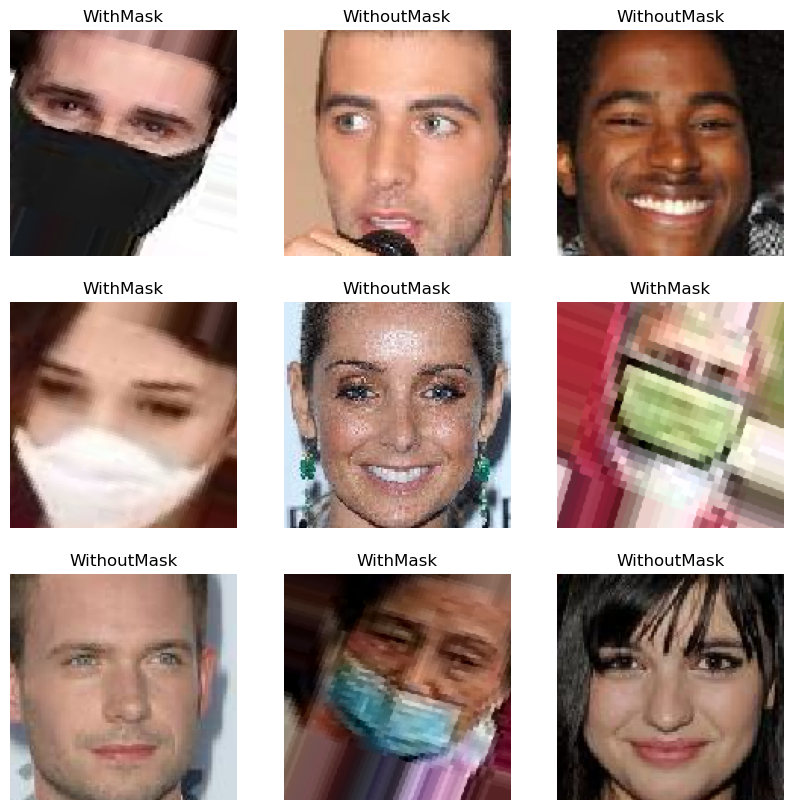

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

### **Modelling**
### **Membuat Model Sequential**

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

2023-11-05 20:13:53.769772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 20:13:53.804783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 20:13:53.804844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 20:13:53.807733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-05 20:13:53.807778: I tensorflow/compile

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

### **Model Compile**

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

### **Proses Training menggunakan fungsi Callback**

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100


2023-11-05 20:13:55.256524: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-05 20:13:55.742063: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-05 20:13:56.625096: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-05 20:13:57.529477: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbec019d770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-05 20:13:57.529531: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-05 20:13:57.537612: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-05 20:13:57.625043: I ./tensorflow/compiler/jit/

8/8 [==============================] - 6s 98ms/step - loss: 0.7196 - accuracy: 0.6367 - val_loss: 0.6080 - val_accuracy: 0.8625
Epoch 2/100
8/8 [==============================] - 1s 72ms/step - loss: 0.4383 - accuracy: 0.8750 - val_loss: 0.5139 - val_accuracy: 0.7937
Epoch 3/100
8/8 [==============================] - 1s 69ms/step - loss: 0.3675 - accuracy: 0.8398 - val_loss: 0.4041 - val_accuracy: 0.8062
Epoch 4/100
8/8 [==============================] - 1s 70ms/step - loss: 0.3252 - accuracy: 0.8516 - val_loss: 0.2785 - val_accuracy: 0.9062
Epoch 5/100
8/8 [==============================] - 1s 71ms/step - loss: 0.3144 - accuracy: 0.8906 - val_loss: 0.1821 - val_accuracy: 0.9438
Epoch 6/100
8/8 [==============================] - 1s 65ms/step - loss: 0.2609 - accuracy: 0.8945 - val_loss: 0.2035 - val_accuracy: 0.9125
Epoch 7/100
8/8 [==============================] - 1s 75ms/step - loss: 0.1769 - accuracy: 0.9375 - val_loss: 0.1320 - val_accuracy: 0.9500
Epoch 8/100
8/8 [===============

### **Evaluasi Model**

In [11]:
model.evaluate(validation_generator)

5/5 [==============================] - 0s 19ms/step - loss: 0.0902 - accuracy: 0.9875


[0.0901912972331047, 0.987500011920929]

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(validation_generator)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(classification_report(validation_generator.classes, y_pred))

5/5 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        80
           1       0.98      1.00      0.99        80

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



### **Grafik pergerakan metrik akurasi dan loss pada training maupun validation**

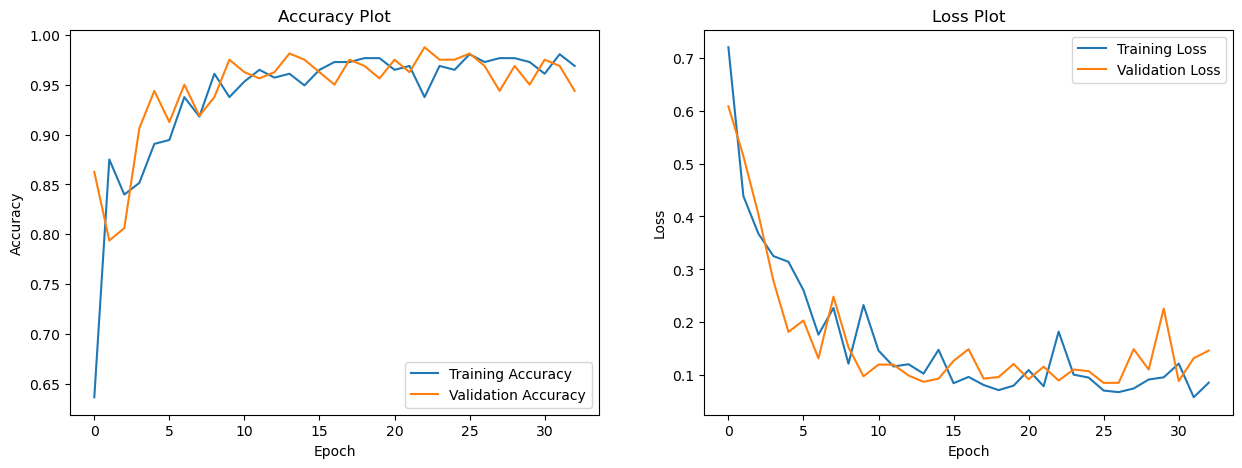

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()